<a href="https://colab.research.google.com/github/Justice00000/neural-network-group10/blob/willy_branch/training%20with%20sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data_path = "water_potability.csv"
df = pd.read_csv(data_path)

# Handle missing values (fill with median)
df.fillna(df.median(), inplace=True)

# Split features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

NameError: name 'Sequential' is not defined

# Start the training Process

In [ ]:
# Build neural network model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5493 - loss: 1.2590 - val_accuracy: 0.6110 - val_loss: 1.1652 - learning_rate: 0.0050
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 1.1541 - val_accuracy: 0.6130 - val_loss: 1.0911 - learning_rate: 0.0050
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 1.0759 - val_accuracy: 0.6151 - val_loss: 1.0298 - learning_rate: 0.0050
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6121 - loss: 1.0259 - val_accuracy: 0.6110 - val_loss: 0.9774 - learning_rate: 0.0050
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6255 - loss: 0.9622 - val_accuracy: 0.6232 - val_loss: 0.9323 - learning_rate: 0.0050
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6349 - loss: 0.9161 - val_accuracy: 0.6293 - val_loss: 0.8936 - learning_rate: 0.0050
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6256 - loss: 0.8881 - val_acc

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.6850
F1 Score: 0.4674
Recall: 0.3542
Precision: 0.6869


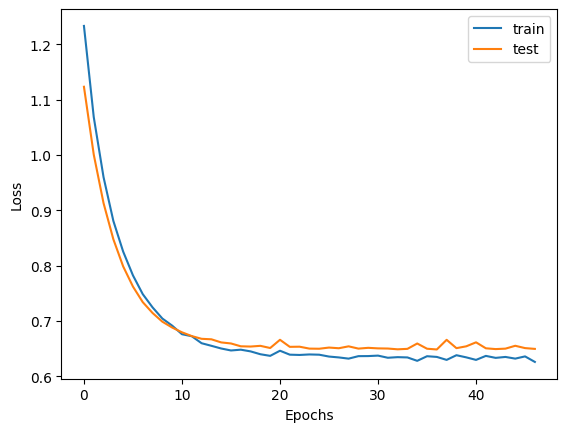

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
